In [1]:
import sys
sys.path.append('../')
from Roma import graphbuilder_v2
from availability_estimation import *
import corridor_builder
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

/Users/polina/Desktop/github/transport_frames/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Транспортные корридоры

In [2]:
lo_polygon = ox.geocode_to_gdf('R176095', by_osmid=True).to_crs(epsg=32636)
spb_polygon = ox.geocode_to_gdf('R337422', by_osmid=True).to_crs(epsg=32636).buffer(3000)
city = lo_polygon.union(spb_polygon).to_crs(epsg=4326) #  get lo polygon

russia = ox.geocode_to_gdf("Russia") #  get border of the country

regions = gpd.read_file('russia.geojson') #  get regions
regions = regions[regions['ISO3166-2']!='RU-CHU']
regions = regions.to_crs(city.crs)

In [ ]:
citygraph = graphbuilder_v2.get_graph_from_polygon(city, crs=32636,country_polygon=russia)
carcas = graphbuilder_v2.get_carcas(citygraph,regions,city)

In [4]:
res = corridor_builder.weigh_roads(carcas).to_crs(3857)

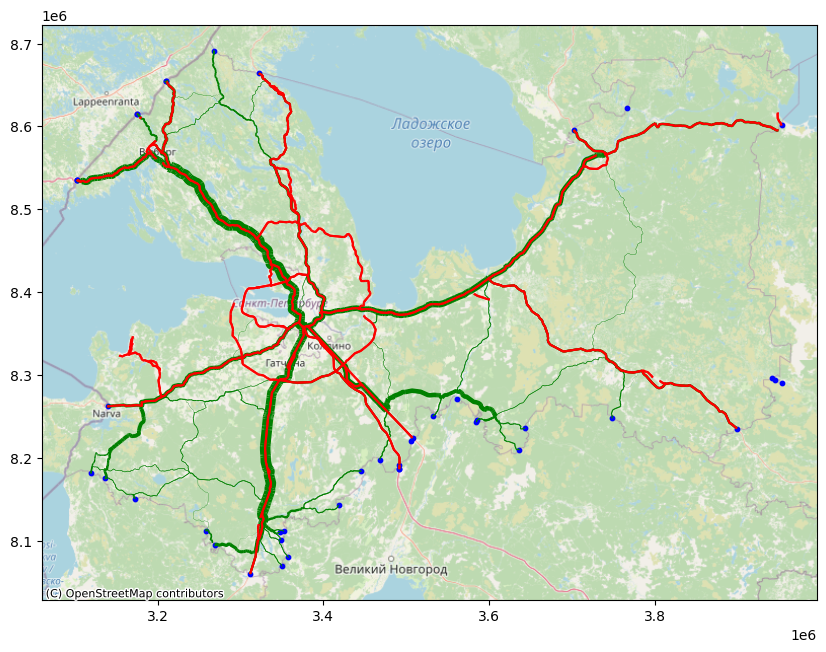

In [5]:
n,e = momepy.nx_to_gdf(carcas)
res['normalized_weight'] = res['weight'] / res['weight'].max()

fig, ax = plt.subplots(figsize=(10, 10))
res.plot(ax=ax, linewidth=res['normalized_weight'] * 8, color='green')
e[e['reg']==1].to_crs(epsg=3857).plot(ax=ax, color='red')
n[n['exit'] == 1].to_crs(epsg=3857).plot(ax=ax, color='blue', markersize=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()
